In [1]:
### Imports ###
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.cluster import KMeans

import acquire
import wrangle

# Acquire

In [2]:
# Commented Out Reason: acquire.py accomodates this now, data acquired later in notebook
# Function: acquire.pull_clustering_zillow()

# Acquire Zillow data
# df = acquire.pull_clustering_zillow()
# df.head(3)

In [3]:
# Commented Out Reason: Filtered query to 'Single Family Residential' in acquire.py

# ### Checking if bringing more than Single Family Residential is worth it ###
# print("Original:", len(df))
# print("Test:", len(df[(df.propertylandusedesc == 'Single Family Residential') | 
#                       (df.propertylandusedesc == 'Mobile Home') | 
#                       (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') | 
#                       (df.architecturalstyledesc == 'Bungalow') | 
#                       (df.architecturalstyledesc == 'Ranch/Rambler')]))
# print("Old:", len(df[(df.propertylandusedesc == 'Single Family Residential')]))

I'm going to leave the options out, I don't really care about a less-than 1% increase in observations.

In [4]:
# Commented Out Reason: Filtered query to 'Single Family Residential' in acquire.py

# ### Filtering to Single Family Residential ###
# df = df[df.propertylandusedesc == 'Single Family Residential']
# df.head(3)

In [5]:
# Commented Out Reason: acquire.py accomodates this now

# ### Begin identifying columns to keep for analysis or drop ###
# print("Null Value Percentages By Column \n")
# for col in df.columns:
#     percentage = (df[col].isna().sum() / len(df)) * 100
#     print(col + ": " + str(round(percentage, 2)) + "%")

**Candidates to drop (high null count):**
typeconstructiontypeid: 99.85%, storytypeid: 99.91%, buildingclasstypeid: 100.0%, architecturalstyletypeid: 99.87%, airconditioningtypeid: 73.98%, basementsqft: 99.91%, decktypeid: 99.26%, finishedfloor1squarefeet: 91.65%, finishedsquarefeet13: 100.0%, finishedsquarefeet15: 100.0%, finishedsquarefeet50: 91.65%, finishedsquarefeet6: 99.68%, fireplacecnt: 86.18%, garagecarcnt: 65.63%, garagetotalsqft: 65.63%, hashottuborspa: 97.11%, poolcnt: 78.83%, poolsizesum: 98.35%, pooltypeid10: 99.15%, pooltypeid2: 97.95%, pooltypeid7: 80.91%, regionidneighborhood: 63.72%, threequarterbathnbr: 87.16%, yardbuildingsqft17: 96.3%, yardbuildingsqft26: 99.88%, numberofstories: 72.22%, fireplaceflag: 99.85%, taxdelinquencyflag: 96.05%, taxdelinquencyyear: 96.05%, airconditioningdesc: 73.98%, architecturalstyledesc: 99.87%, buildingclassdesc: 100.0%, storydesc: 99.91%, typeconstructiondesc: 99.85%

**Candidates to investigate after MVP (moderate null count):**
heatingorsystemtypeid: 35.3%, buildingqualitytypeid: 35.67%, propertyzoningdesc: 35.47%, unitcnt: 35.47%, heatingorsystemdesc: 35.3%


**Candidates to keep in MVP (low null count):**
parcelid: 0.0%, transactiondate: 0.0%, propertylandusetypeid: 0.0%, bathroomcnt: 0.0%, bedroomcnt: 0.0%, calculatedbathnbr: 0.26%, calculatedfinishedsquarefeet: 0.15%, finishedsquarefeet12: 0.47%, fips: 0.0%, fullbathcnt: 0.26%, latitude: 0.0%, longitude: 0.0%, lotsizesquarefeet: 0.7%, propertycountylandusecode: 0.0%, rawcensustractandblock: 0.0%, regionidcity: 1.98%, regionidcounty: 0.0%, regionidzip: 0.05%, roomcnt: 0.0%, yearbuilt: 0.22%, structuretaxvaluedollarcnt: 0.16%, taxvaluedollarcnt: 0.0%, assessmentyear: 0.0%, landtaxvaluedollarcnt: 0.0%, taxamount: 0.01%, censustractandblock: 0.23%, logerror: 0.0%, propertylandusedesc: 0.0%, property_id: 0.0%, transaction_id: 0.0%

In [6]:
# Commented Out Reason: acquire.py accomodates this now

# df = df.drop(columns=['typeconstructiontypeid', 'storytypeid', 'buildingclasstypeid', 
#                       'architecturalstyletypeid', 'airconditioningtypeid', 'basementsqft', 'decktypeid', 
#                       'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 
#                       'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 
#                       'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 
#                       'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'threequarterbathnbr', 
#                       'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 
#                       'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 
#                       'buildingclassdesc', 'storydesc', 'typeconstructiondesc'])
# df.head(3)

In [7]:
# Commented Out Reason: acquire.py accomodates this now

# df = df.drop(columns = ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 
#                         'unitcnt', 'heatingorsystemdesc'])
# df.head(3)

**Candidates to keep:**
parcelid
propertyid
transactionid
transactiondate
propertylandusetypeid
bathroomcnt
bedroomcnt
calculatedfinishedsquarefeet
latitude
longitude
lotsizesquarefeet
propertycountylandusecode
regionidcity
regionidcounty
regionidzip
roomcnt
yearbuilt
structuretaxvaluedollarcnt
landtaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
taxamount
logerror
propertylandusetypeid
calculatedbathnbr
finishedsquarefeet12
fullbathcnt

**Drop because I'm not interested in investigating it:**
assessmentyear
rawcensustractandblock
censustractandblock
propertylandusedesc
propertylandusetypeid

In [8]:
# Commented Out Reason: acquire.py accomodates this now

# df = df.drop(columns=['assessmentyear', 'rawcensustractandblock', 'censustractandblock', 
#                       'propertylandusedesc', 'propertylandusetypeid'])
# df.head(3)

In [9]:
# Commented Out Reason: acquire.py accomodates this now

# df.columns

**Groupings to break out after MVP:**
- Parcel info: 'propertycountylandusecode', 'parcelid', 'yearbuilt', 'property_id', 'transaction_id', 'transactiondate', 'taxamount'
- Locality: 'fips', 'regionidcity', 'regionidcounty', 'regionidzip'
- Home/Lot value: 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'
- Size: 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'finishedsquarefeet12'
- Rooms: 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt'

**Columns to use immediately:**
'parcelid', 'fips', 'latitude', 'longitude', 'taxvaluedollarcnt', 'logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 

In [10]:
# Commented Out Reason: acquire.py accomodates this now

# col_list = ['parcelid', 'fips', 'latitude', 'longitude', 
#             'taxvaluedollarcnt', 'logerror', 
#             'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']

# df = df[col_list]
# df.head(3)

# Prepare - MVP

In [11]:
# Commented Out Reason: wrangle.py accomodates this now
### Acquire for MVP ###
# df = acquire.MVP_pull_clustering_zillow()
# df.head(3)

In [12]:
# Commented Out Reason: Nulls handled in wrangle.py

# print('Observations:', len(df), '\n')
# print('Nulls:\n', df.isna().sum())

In [13]:
# Commented Out Reason: Nulls handled in wrangle.py

# df = df.dropna()
# df.head(3)

In [14]:
# Commented Out Reason: Dtypes handled in wrangle.py

# df['parcelid'] = df.parcelid.astype('str')
# df['fips'] = df.fips.astype('int').astype('str')
# df['latitude'] = df.latitude.astype('int')
# df['longitude'] = df.longitude.astype('int')
# df['taxvaluedollarcnt'] = df.taxvaluedollarcnt.astype('int')
# df['calculatedfinishedsquarefeet'] = df.calculatedfinishedsquarefeet.astype('int')
# df.head(3)

wrangle.py additions: rename columns, keep/remove outliers, split data 60 / 20 / 20, isolate 'logerror' target, scale numeric data using StandardScaler

In [15]:
# # Full results with outliers
# df_out, X_train_exp_out,\
# X_train_out, y_train_out,\
# X_validate_out, y_validate_out,\
# X_test_out, y_test_out = wrangle.wrangle_zillow_MVP_keep_outliers()

# Full results with outliers removed via IQR
df, X_train_exp,\
X_train, y_train,\
X_validate, y_validate,\
X_test, y_test = wrangle.wrangle_zillow_MVP()

print(X_train_exp.shape)
X_train_exp.head(3)

(27504, 17)


,Parcel.ID,County,Latitude,Longitude,Home.Value,Baths,Beds,Finished.Area,is_coastal,cool_places,Prediction.Error,Home.Value.Scaled,Baths.Scaled,Beds.Scaled,Finished.Area.Scaled,Is.Coastal.Scaled,Is.Cool.Place.Scaled
9816,14433972,Orange,33494840,-117693964,1032894,3.5,3.0,2841,False,False,0.064047,2.545324,1.926880,-0.261993,1.894494,0.152861,0.508689
40848,14037584,Orange,33742714,-118017115,59427,2.0,4.0,1182,False,False,0.012524,-1.244041,-0.133840,1.008879,-0.854941,0.152861,0.508689
38048,11693178,LA,33992973,-118287389,238563,1.0,3.0,2628,False,False,0.098879,-0.546727,-1.507654,-0.261993,1.541492,0.152861,0.508689


In [16]:
# County histogram
# plt.figure(figsize=(10,7))
# sns.histplot(df.County)
# plt.title('County Histogram')
# plt.show()

In [17]:
# Bedroom count histogram
# plt.figure(figsize=(10,7))
# sns.histplot(df.Beds)
# plt.title('Bedroom Count Histogram')
# plt.show()

In [18]:
# Bathroom count histogram
# plt.figure(figsize=(10,7))
# sns.histplot(df.Baths)
# plt.title('Bathroom Count Histogram')
# plt.show()

In [19]:
# Finished area histogram
# plt.figure(figsize=(12,7))
# sns.histplot(df['Finished.Area'])
# plt.title('Finished Area Histogram')
# plt.show()

In [20]:
# Home value histogram
# plt.figure(figsize=(15,7))
# value_plot = sns.histplot(df['Home.Value'])
# plt.title('Home Value Histogram')
# value_plot.xaxis.set_major_formatter('{:,.0f}'.format)
# plt.show()

In [21]:
# Lat/Long scatterplot by county
# plt.figure(figsize=(15,7))
# sns.scatterplot(df.Longitude, df.Latitude, hue=df.County)

# Explore - MVP

Since we're looking at Prediction Error as the target, we should look to see if any current values correlate with the Prediction Error as the first step.

<AxesSubplot:>

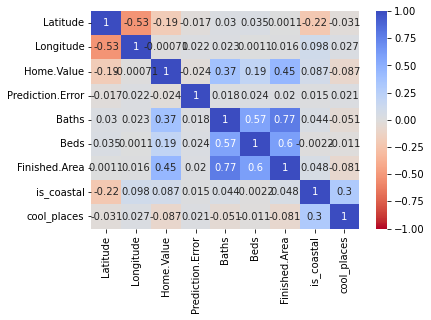

In [22]:
sns.heatmap(df.corr(), cmap='coolwarm_r', vmin=-1, vmax=1, annot=True)

Since no value correlates strongly with Prediction Error, we should investigate further. One idea is to take **coastline properties** as a feature to see if the correlation is there.

Before we do that, let's first look at 

## Coastal Property Identification

In [23]:
print(len(df))
print(len(df.Latitude.unique()))

45842
44297


In [24]:
# Decimal Degrees with 3 decimal places is 111.1 meters, I found this to be the best dividing line later
df['relaxed_lat'] = 2.5 * round(df['Latitude'] / 2500000, 3)
# df_out['relaxed_lat'] = 2.5 * round(df['Latitude'] / 2500000, 3)

df['relaxed_long'] = 2.5 * round(df['Longitude'] / 2500000, 3)
# df_out['relaxed_long'] = 2.5 * round(df['Longitude'] / 2500000, 3)

df.head(3)

,Parcel.ID,County,Latitude,Longitude,Home.Value,Prediction.Error,Baths,Beds,Finished.Area,is_coastal,cool_places,relaxed_lat,relaxed_long
0,14297519,Orange,33634931,-117869207,1023282,0.025595,3.5,4.0,3100,False,False,33.635,-117.8700
1,17052889,Ventura,34449266,-119281531,464000,0.055619,1.0,2.0,1465,False,False,34.450,-119.2825
2,14186244,Orange,33886168,-117823170,564778,0.005383,2.0,3.0,1243,False,False,33.885,-117.8225


In [25]:
print(len(df))
print(len(df.relaxed_lat.unique()))

45842
553


With this scope, we're looking at *10 properties per unique latitude*. If we only look at one or two of the westmost properties per latitude, that should give us coastal properties.

Another consideration: The northmost latitude is not coastal - start with the northmost coastal property.

In [26]:
# Northmost coastal property (the westernmost coastal property is the westernmost property)
df[df['Longitude'] == df['Longitude'].min()].sort_values(by='relaxed_lat', ascending=False).head(1)
# df_out[df_out['Longitude'] == df_out['Longitude'].min()].sort_values(by='relaxed_lat', ascending=False).head(1)

,Parcel.ID,County,Latitude,Longitude,Home.Value,Prediction.Error,Baths,Beds,Finished.Area,is_coastal,cool_places,relaxed_lat,relaxed_long
12465,17051025,Ventura,34374072,-119475416,1075583,-0.156173,2.0,3.0,1686,False,False,34.375,-119.475


- Start with northernmost coastal property (filter out more-north properties)
- Group by each latitude
- Find minimum longitude
- Store minimum longitude to the latitude key in a dict
- Then
- Iterate through each observation
- Check each observation's latitude for existence in keys
- If key exists, check observation's longitude for match to value
- If observation matches both, mark True in new column
- If observation fails either of the above checks, mark False

In [27]:
latlong_dict = dict(df.groupby('relaxed_lat').Longitude.min())
# latlong_dict_out = dict(df_out.groupby('relaxed_lat').Longitude.min())

longlat_dict = dict(df.groupby('relaxed_long').Latitude.min())
# longlat_dict_out = dict(df.groupby('relaxed_long').Latitude.min())

In [28]:
df['is_coastal_horizontal'] = ((df['relaxed_lat'] <= 34.374) & 
                            (df['relaxed_lat'].apply(lambda x: latlong_dict.get(x)) == df['Longitude']))

# df_out['is_coastal_horizontal'] = ((df_out['relaxed_lat'] <= 34.374) & 
#                                (df_out['relaxed_lat'].apply(lambda x: latlong_dict.get(x)) == df_out['Longitude']))


df['is_coastal_vertical'] = df['relaxed_long'].apply(lambda x: longlat_dict.get(x)) == df['Latitude']

# df_out['is_coastal_vertical'] = df_out['relaxed_long'].apply(lambda x: longlat_dict.get(x)) == df_out['Latitude']

# df_out.head(3)

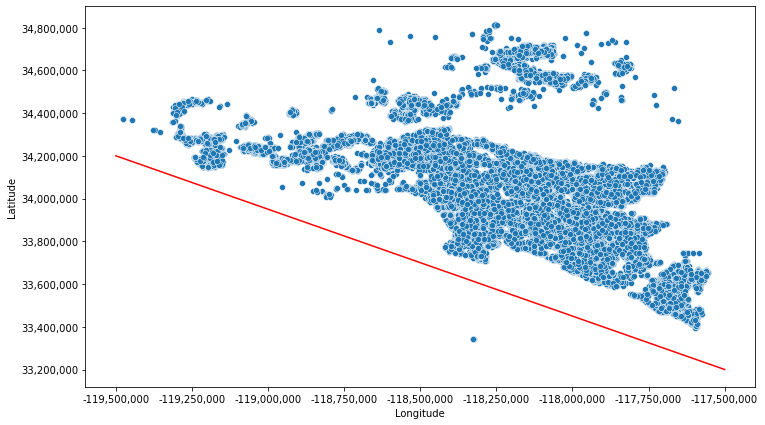

In [29]:
plt.figure(figsize=(12,7))
scatplot = sns.scatterplot(df.Longitude, df.Latitude)
scatplot.xaxis.set_major_formatter('{:,.0f}'.format)
scatplot.yaxis.set_major_formatter('{:,.0f}'.format)
plt.plot((-119500000, -117500000), (34200000, 33200000), c='red')

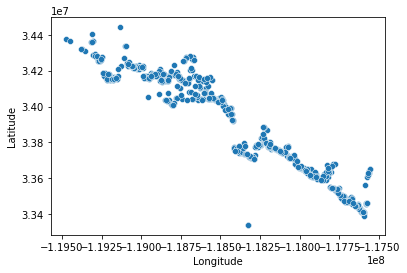

In [30]:
sns.scatterplot(data=df[df.is_coastal_vertical], x='Longitude', y='Latitude')
plt.show()
# sns.scatterplot(data=df_out[df_out.is_coastal_vertical], x='Longitude', y='Latitude')

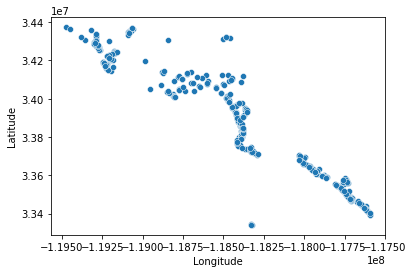

In [31]:
sns.scatterplot(data=df[df.is_coastal_horizontal], x='Longitude', y='Latitude')
plt.show()
# sns.scatterplot(data=df_out[df_out.is_coastal_horizontal], x='Longitude', y='Latitude')

In [32]:
print(df['is_coastal_vertical'].mean())
# df_out['is_coastal_vertical'].mean()

0.015269839884821779


In [33]:
print(df['is_coastal_horizontal'].mean())
# df_out['is_coastal_horizontal'].mean()

0.008638366563413463


In [34]:
print(df.groupby('is_coastal_vertical')['Prediction.Error'].mean())
# df_out.groupby('is_coastal_vertical')['Prediction.Error'].mean()

is_coastal_vertical
False    0.016609
True     0.018294
Name: Prediction.Error, dtype: float64


In [35]:
print(df.groupby('is_coastal_horizontal')['Prediction.Error'].mean())
# df_out.groupby('is_coastal_horizontal')['Prediction.Error'].mean()

is_coastal_horizontal
False    0.016596
True     0.021098
Name: Prediction.Error, dtype: float64


## Coastal Property Hypothesis Testing
$H_0$: On average, coastal properties are *not* predicted lower than actual cost more often than non-coastal properties.

$H_a$: On average, coastal properties are predicted lower than actual cost more often than non-coastal properties.

In [36]:
# Set alpha
alpha = .05
# Run test
t, p = stats.mannwhitneyu(df[df.is_coastal_horizontal]['Prediction.Error'], 
                          df[df.is_coastal_horizontal == False]['Prediction.Error'],
                          alternative='greater')

# Print findings
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We accept the null hypothesis.")

We accept the null hypothesis.


Let's run the correlation heatmap again with the new is_coastal feature.

<AxesSubplot:>

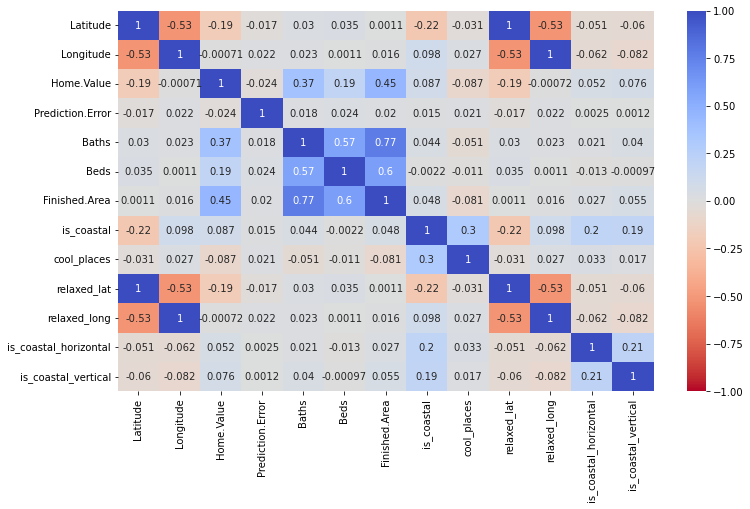

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='coolwarm_r', vmin=-1, vmax=1, annot=True)

In [38]:
df['is_coastal'] = df['is_coastal_vertical'] & df['is_coastal_horizontal']
df.head(3)

,Parcel.ID,County,Latitude,Longitude,Home.Value,Prediction.Error,Baths,Beds,Finished.Area,is_coastal,cool_places,relaxed_lat,relaxed_long,is_coastal_horizontal,is_coastal_vertical
0,14297519,Orange,33634931,-117869207,1023282,0.025595,3.5,4.0,3100,False,False,33.635,-117.8700,False,False
1,17052889,Ventura,34449266,-119281531,464000,0.055619,1.0,2.0,1465,False,False,34.450,-119.2825,False,False
2,14186244,Orange,33886168,-117823170,564778,0.005383,2.0,3.0,1243,False,False,33.885,-117.8225,False,False


In [39]:
df.is_coastal.mean()

0.0025522446664630687

<AxesSubplot:xlabel='is_coastal', ylabel='Prediction.Error'>

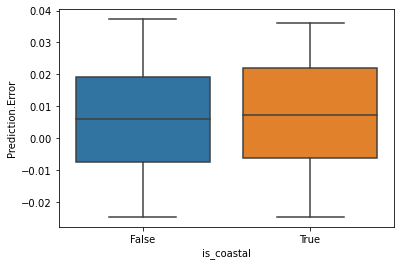

In [40]:
q1, q3 = df['Prediction.Error'].quantile([0.25, 0.75])
mask = (df['Prediction.Error'] > q1) & (df['Prediction.Error'] < q3)
sns.boxplot(df[mask]['is_coastal'], df[mask]['Prediction.Error'])

<AxesSubplot:>

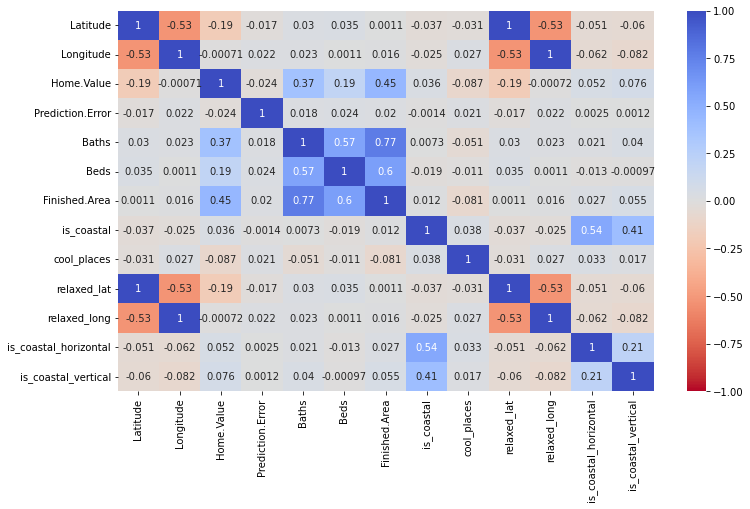

In [41]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='coolwarm_r', vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

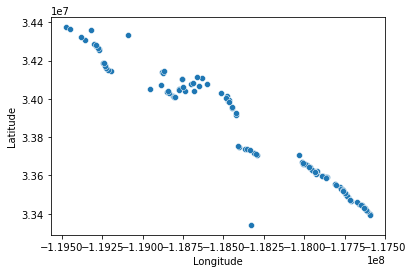

In [42]:
sns.scatterplot(df[df.is_coastal].Longitude, df[df.is_coastal].Latitude)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45842 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Parcel.ID              45842 non-null  object 
 1   County                 45842 non-null  object 
 2   Latitude               45842 non-null  int64  
 3   Longitude              45842 non-null  int64  
 4   Home.Value             45842 non-null  int64  
 5   Prediction.Error       45842 non-null  float64
 6   Baths                  45842 non-null  float64
 7   Beds                   45842 non-null  float64
 8   Finished.Area          45842 non-null  int64  
 9   is_coastal             45842 non-null  bool   
 10  cool_places            45842 non-null  bool   
 11  relaxed_lat            45842 non-null  float64
 12  relaxed_long           45842 non-null  float64
 13  is_coastal_horizontal  45842 non-null  bool   
 14  is_coastal_vertical    45842 non-null  bool   
dtypes: